In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from surface_algorithm import surface_mask

In [2]:
filename = "../data/l1b/level1b_with_db_and_surface_fractions_20250202190258_20250202204008_r1.nc"

# level1b_with_db_and_surface_fractions_20250224212320_20250224230124_r1.nc - greenland area
# level1b_with_db_and_surface_fractions_20250731154553_20250731172152_r1.nc - himalayas

#level1b_with_db_and_surface_fractions_20250715191802_20250715205459_r1.nc


In [3]:
date = filename[-35:-21]
print(date)

20250202190258


In [4]:
ds = xr.open_dataset(filename)

/home/eleanor/mambaforge/envs/aws/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1692: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)
/home/eleanor/mambaforge/envs/aws/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1692: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


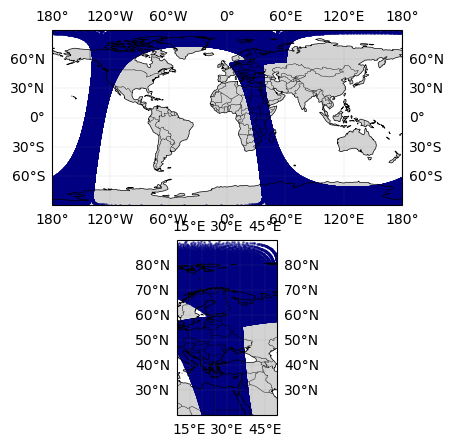

In [5]:
proj = ccrs.PlateCarree()

fig, axes = plt.subplots(2, 1,
    figsize=(5, 5),
    subplot_kw={"projection": proj}
)

for ax in axes.flatten():
    
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="white")
    ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
    

sc = axes[0].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c='navy',
    s=1,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
    cmap="viridis"
)

axes[1].set_extent([10, 50, 20, 90], crs=ccrs.PlateCarree())

sc = axes[1].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c='navy',
    s=1,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
    cmap="viridis"
)

In [6]:
mask = (
        (ds.flag_overlap == False)
        & (ds.flag_bad_data == 0)
)

for var_to_mask in ['aws_toa_brightness_temperature']:
    ds[var_to_mask] = ds[var_to_mask].where(mask)


In [7]:
aws31 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS31")
aws32 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS32")
aws35 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS35")
aws36 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS36")
aws34 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS34")
aws33 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS33")
aws43 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS43")
aws44 = ds.aws_toa_brightness_temperature.sel(n_channels=f"AWS44")

print(aws33 - aws44)

mask_event = (aws33 - aws34) < -2
mask_event = mask_event & ((aws44 - aws43) < -2)
#mask_event = mask_event & ( ( (aws44 - aws43) > (aws33 - aws34) ) )
mask_event = mask_event & ( (aws33-aws44) < 10 )


<xarray.DataArray 'aws_toa_brightness_temperature' (n_scans: 4857, n_fovs: 145)> Size: 6MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     (n_scans) datetime64[ns] 39kB 2025-02-02T19:02:40.860411648 ... ...
Dimensions without coordinates: n_scans, n_fovs


In [8]:
mask_33_44 = surface_mask(ds, 33)
mask_34_43 = surface_mask(ds, 34)
mask_35_42 = surface_mask(ds, 35)
mask_31 = surface_mask(ds, 31)

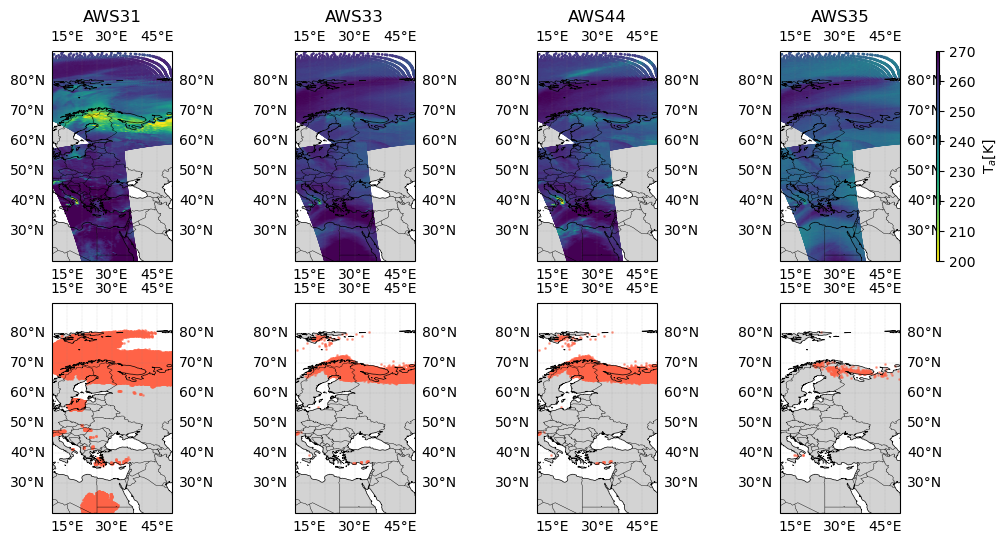

In [11]:
proj = ccrs.PlateCarree()
#proj = ccrs.NorthPolarStereo()

fig, axes = plt.subplots(2, 4,
    figsize=(12, 6),
    subplot_kw={"projection": proj}
)

extent = [10, 50, 20, 90]

for ax in axes.flatten():
    #ax.set_extent([60, 90, 0, 50], crs=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="white")
    ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')


sc = axes[0,0].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws31,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="viridis_r",
    vmin=200,
    vmax=270
)
axes[0,0].set_title("AWS31")

sc = axes[0,1].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws33,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="viridis_r",
    vmin=200,
    vmax=270
)
axes[0,1].set_title("AWS33")

sc = axes[0,2].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws44,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="viridis_r",
    vmin=200,
    vmax=270
)
axes[0,2].set_title("AWS44")

sc = axes[0,3].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws35,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="viridis_r",
    vmin=200,
    vmax=270
)
axes[0,3].set_title("AWS35")

axes[1,0].scatter(
    ds.aws_lon.values[mask_31],
    ds.aws_lat.values[mask_31],
    color="tomato",
    s=1,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

axes[1,1].scatter(
    ds.aws_lon.values[mask_33_44],
    ds.aws_lat.values[mask_33_44],
    color="tomato",
    s=1,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

axes[1,2].scatter(
    ds.aws_lon.values[mask_33_44],
    ds.aws_lat.values[mask_33_44],
    color="tomato",
    s=1,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

axes[1,3].scatter(
    ds.aws_lon.values[mask_35_42],
    ds.aws_lat.values[mask_35_42],
    color="tomato",
    s=1,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

cax = inset_axes(
    axes[0, 3],
    width="3%",      # bar thickness
    height="100%",   # match top-row height
    loc="lower left",
    bbox_to_anchor=(1.3, 0.0, 1, 1),
    bbox_transform=axes[0, 3].transAxes,
    borderpad=0,
)

cbar = fig.colorbar(sc, cax=cax, orientation="vertical")
cbar.set_label(r"T$_{a}$[K]")

extent_str = "_".join(map(str, extent))

plt.savefig(
        f"../figures/surface_handling/example_cases/{filename[-35:-21]}_{extent_str}.png",
        #f"../../../../PHD/Projects/Cloud_Filtering/figures/ARTS_simulations/all_dTb_pairs/TCWV_vs_dTb_neighbours_{atmospheric_scenario}_T{surface_T}_r{reflectivity}.png",
        facecolor="white",
        bbox_inches="tight",
        pad_inches=0.1,
        dpi=200,
    )



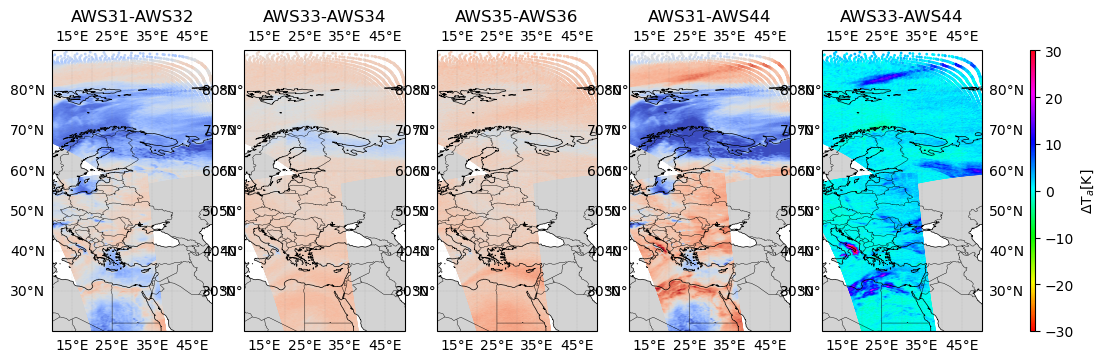

In [10]:
proj = ccrs.PlateCarree()
#proj = ccrs.NorthPolarStereo()

fig, axes = plt.subplots(1, 5,
    figsize=(12, 6),
    subplot_kw={"projection": proj}
)

for ax in axes.flatten():
    #ax.set_extent([60, 90, 0, 50], crs=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="white")
    ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')

sc = axes[0].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws31-aws32,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    vmin=-30,
    vmax=30
)
axes[0].set_title("AWS31-AWS32")

sc = axes[1].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws33-aws34,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    vmin=-30,
    vmax=30
)
axes[1].set_title("AWS33-AWS34")

sc = axes[2].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws35-aws36,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    vmin=-30,
    vmax=30
)
axes[2].set_title("AWS35-AWS36")

sc = axes[3].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws31-aws44,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    vmin=-30,
    vmax=30
)
axes[3].set_title("AWS31-AWS44")

sc = axes[4].scatter(
    ds.aws_lon.values,
    ds.aws_lat.values,
    c=aws33-aws44,
    s=1,
    alpha=1,
    transform=ccrs.PlateCarree(),
    cmap="hsv",
    vmin=-30,
    vmax=30
)
axes[4].set_title("AWS33-AWS44")

cax = inset_axes(
    axes[2],
    width="3%",      # bar thickness
    height="100%",   # match top-row height
    loc="lower left",
    bbox_to_anchor=(1.3, 0.0, 1, 1),
    bbox_transform=axes[4].transAxes,
    borderpad=0,
)

cbar = fig.colorbar(sc, cax=cax, orientation="vertical")
cbar.set_label(r"$\Delta$T$_{a}$[K]")


plt.savefig(
        f"../figures/surface_handling/example_cases/{filename[-35:-21]}_{extent_str}_dTb.png",
        #f"../../../../PHD/Projects/Cloud_Filtering/figures/ARTS_simulations/all_dTb_pairs/TCWV_vs_dTb_neighbours_{atmospheric_scenario}_T{surface_T}_r{reflectivity}.png",
        facecolor="white",
        bbox_inches="tight",
        pad_inches=0.1,
        dpi=200,
    )
